In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data_path = "./Annotations/train.json"
with open(data_path) as f:
    data = json.load(f)

# valid answers    
answers = [] 
answerable = []
for qa in data:
    answers.append(qa["answers"])
    answerable.append(qa["answerable"])

## Percentage of unanswered questions

In [3]:
answerable = np.array(answerable)
total_questions = len(answerable)
total_answerable = answerable.sum()
answerable_percent = total_answerable/total_questions

print("Total questions: {}".format(total_questions))
print("Total answerable questions: {}".format(total_answerable))
print("Anserable percentage: {}".format(answerable_percent))

Total questions: 20523
Total answerable questions: 14991
Anserable percentage: 0.7304487648004677


## Analysis of answer length 

In [4]:
answer_list = []
for ans in answers:
    for a in ans:
        answer_list.append(a["answer"])

In [5]:
answer_lens = [len(a) for a in answer_list]
a_lens = pd.DataFrame(answer_lens)
a_lens.describe()

,0
count,205230.000000
mean,10.802631
std,7.709030
min,0.000000
25%,6.000000
50%,10.000000
75%,12.000000
max,98.000000


## Answers wordcloud without unanswerable/unsuitable answers

In [6]:
answer_wc = []
for ans in answers:
    for a in ans:
        if a["answer"] != "unanswerable" and a["answer"] != "unsuitable":
            answer_wc.append(a["answer"])

Answers wordcloud without unanswerable/unsuitable answers


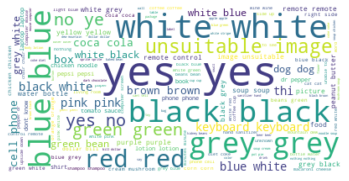

In [7]:
print("Answers wordcloud without unanswerable/unsuitable answers")
wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white").generate(" ".join(answer_wc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Answer confidence analysis

In [8]:
yes_confidence = []
for ans in answers:
    yes = 0
    total = len(ans)
    for a in ans:
        if a["answer_confidence"] == 'yes':
            yes += 1
    yes_confidence.append(yes/total)

In [9]:
yes_df = pd.DataFrame(yes_confidence)
yes_df.describe()

,0
count,20523.000000
mean,0.769425
std,0.179342
min,0.100000
25%,0.600000
50%,0.800000
75%,0.900000
max,1.000000


In [10]:
total_questions = len(yes_confidence)
confidence_100 = 0
confidence_80 = 0
confidence_50 = 0
for y in yes_confidence:
    if y == 1:
        confidence_100 += 1
    if y >= 0.8:
        confidence_80 += 1
    if y >= 0.5:
        confidence_50 += 1

print("There are total {} questions. Each question has 10 answers. Each answer has confidence level ranging from 'yes', 'maybe' to 'no'".format(total_questions))
print("Among all questions, there are {} questions ({} percent) that all answers have confidence level of 'yes'".format(confidence_100, confidence_100/total_questions))
print("There are {} questions ({} percent) that at least 8 answers have confidence level of 'yes'".format(confidence_80, confidence_80/total_questions))
print("There are {} questions ({} percent) that at least half answers have confidence level of 'yes'".format(confidence_50, confidence_50/total_questions))

There are total 20523 questions. Each question has 10 answers. Each answer has confidence level ranging from 'yes', 'maybe' to 'no'
Among all questions, there are 3863 questions (0.18822784193344053 percent) that all answers have confidence level of 'yes'
There are 11715 questions (0.5708229790966233 percent) that at least 8 answers have confidence level of 'yes'
There are 19466 questions (0.9484968084588024 percent) that at least half answers have confidence level of 'yes'


## Answer agreement analysis

In [12]:
agreement_5 = 0
agreement_3 = 0
for ans in answers:
    answer_dict = dict()
    for a in ans:
        if a['answer'] in answer_dict:
            answer_dict[a['answer']] += 1
        else:
            answer_dict[a['answer']] = 1
    max_agreement = np.array(list(answer_dict.values())).max()
    if max_agreement > 5:
        agreement_5 +=1 
    if max_agreement > 3:
        agreement_3 += 1

        
print("More than 5 people agreed on the most popular answer for {} of visual questions".format(agreement_5/total_questions))
print("More than 3 people agreed on the most popular answer for {} of visual questions".format(agreement_3/total_questions))
print("This agreement level is the lower bound since less stringent agreement measures (e.g., that resolve synonyms)")

More than 5 people agreed on the most popular answer for 0.40539882083516054 of visual questions
More than 3 people agreed on the most popular answer for 0.7319592652146373 of visual questions
This agreement level is the lower bound since less stringent agreement measures (e.g., that resolve synonyms)
